In [22]:
import pandas as pd
import re
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

In [23]:
# Define the path to the transcription file
# file_path = 'transcriptions\\transcription_project3_4th.txt'
file_path = 'transcriptions\\transcription_project4_1st.txt'

In [24]:
# Read the transcription file
with open(file_path, 'r', encoding='utf-8') as file:
    data = file.read()

In [25]:
# Extract speaker turns
speaker_pattern = re.compile(r'Speaker (SPEAKER_\d+):')
turns = speaker_pattern.split(data)[1:]  # Split and remove the first empty element
speakers = turns[0::2]
texts = turns[1::2]

In [26]:
# Create a DataFrame
df = pd.DataFrame({
    'Speaker': speakers,
    'Text': texts
})

In [27]:
# Interaction Matrix
interaction_matrix = defaultdict(lambda: defaultdict(int))
for i in range(1, len(df)):
    prev_speaker = df.iloc[i-1]['Speaker']
    curr_speaker = df.iloc[i]['Speaker']
    interaction_matrix[prev_speaker][curr_speaker] += 1

interaction_df = pd.DataFrame(interaction_matrix).fillna(0)

In [28]:
# Convert interaction matrix to JSON
interaction_json = interaction_df.to_dict(orient='index')

In [29]:
# Frequency Analysis
frequency = df['Speaker'].value_counts().reset_index()
frequency.columns = ['Speaker', 'Frequency']

In [30]:
# Convert frequency analysis to JSON
frequency_json = frequency.to_dict(orient='records')

In [31]:
# Create Interaction Network Graph
G = nx.DiGraph()
for i in range(1, len(df)):
    prev_speaker = df.iloc[i-1]['Speaker']
    curr_speaker = df.iloc[i]['Speaker']
    if G.has_edge(prev_speaker, curr_speaker):
        G[prev_speaker][curr_speaker]['weight'] += 1
    else:
        G.add_edge(prev_speaker, curr_speaker, weight=1)

In [32]:
# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)

Degree Centrality: {'SPEAKER_00': 2.5, 'SPEAKER_01': 2.5, 'SPEAKER_03': 2.5, 'SPEAKER_04': 2.5, 'SPEAKER_02': 2.5}
Betweenness Centrality: {'SPEAKER_00': 0.0, 'SPEAKER_01': 0.0, 'SPEAKER_03': 0.0, 'SPEAKER_04': 0.0, 'SPEAKER_02': 0.0}
Closeness Centrality: {'SPEAKER_00': 1.0, 'SPEAKER_01': 1.0, 'SPEAKER_03': 1.0, 'SPEAKER_04': 1.0, 'SPEAKER_02': 1.0}
Eigenvector Centrality: {'SPEAKER_00': 0.4472135954999579, 'SPEAKER_01': 0.4472135954999579, 'SPEAKER_03': 0.4472135954999579, 'SPEAKER_04': 0.4472135954999579, 'SPEAKER_02': 0.4472135954999579}


Communities: [frozenset({'SPEAKER_00'}), frozenset({'SPEAKER_01'}), frozenset({'SPEAKER_03'}), frozenset({'SPEAKER_04'}), frozenset({'SPEAKER_02'})]


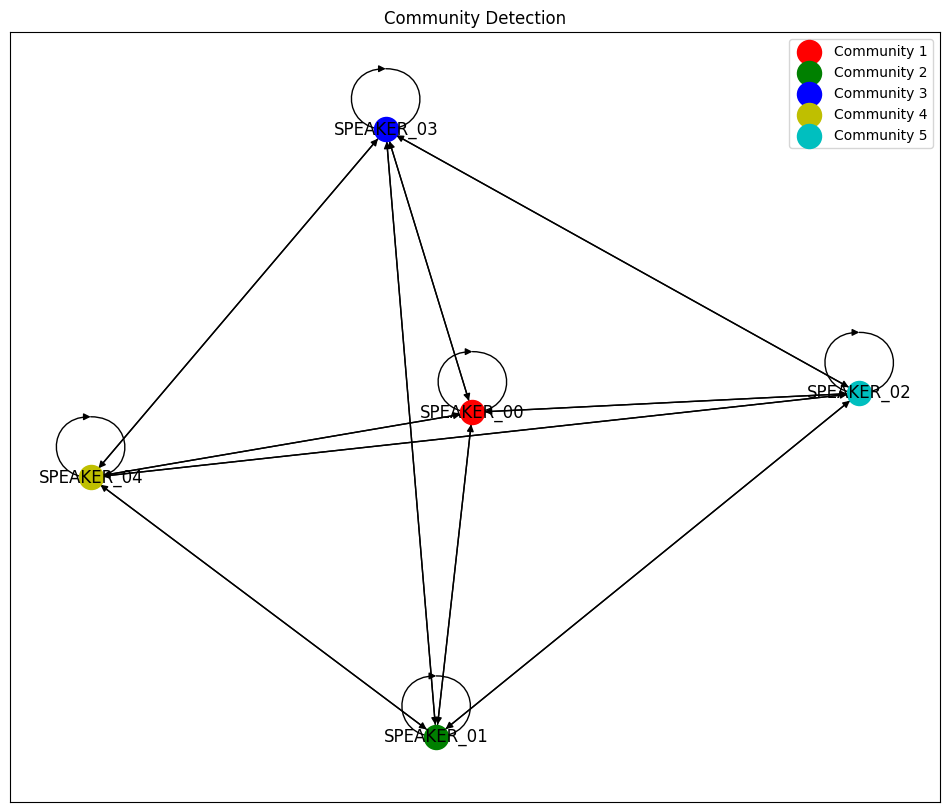

In [33]:
# Community Detection
communities = list(greedy_modularity_communities(G))
print("Communities:", communities)

# Visualization of communities
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 10))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title('Community Detection')
plt.legend()
plt.show()

In [34]:
# Network Density and Average Clustering
density = nx.density(G)
average_clustering = nx.average_clustering(G)
print("Network Density:", density)
print("Average Clustering Coefficient:", average_clustering)

Network Density: 1.25
Average Clustering Coefficient: 1.0


Shortest Paths: {'SPEAKER_00': {'SPEAKER_00': ['SPEAKER_00'], 'SPEAKER_01': ['SPEAKER_00', 'SPEAKER_01'], 'SPEAKER_03': ['SPEAKER_00', 'SPEAKER_03'], 'SPEAKER_04': ['SPEAKER_00', 'SPEAKER_04'], 'SPEAKER_02': ['SPEAKER_00', 'SPEAKER_02']}, 'SPEAKER_01': {'SPEAKER_01': ['SPEAKER_01'], 'SPEAKER_00': ['SPEAKER_01', 'SPEAKER_00'], 'SPEAKER_04': ['SPEAKER_01', 'SPEAKER_04'], 'SPEAKER_03': ['SPEAKER_01', 'SPEAKER_03'], 'SPEAKER_02': ['SPEAKER_01', 'SPEAKER_02']}, 'SPEAKER_03': {'SPEAKER_03': ['SPEAKER_03'], 'SPEAKER_00': ['SPEAKER_03', 'SPEAKER_00'], 'SPEAKER_01': ['SPEAKER_03', 'SPEAKER_01'], 'SPEAKER_04': ['SPEAKER_03', 'SPEAKER_04'], 'SPEAKER_02': ['SPEAKER_03', 'SPEAKER_02']}, 'SPEAKER_04': {'SPEAKER_04': ['SPEAKER_04'], 'SPEAKER_01': ['SPEAKER_04', 'SPEAKER_01'], 'SPEAKER_00': ['SPEAKER_04', 'SPEAKER_00'], 'SPEAKER_03': ['SPEAKER_04', 'SPEAKER_03'], 'SPEAKER_02': ['SPEAKER_04', 'SPEAKER_02']}, 'SPEAKER_02': {'SPEAKER_02': ['SPEAKER_02'], 'SPEAKER_03': ['SPEAKER_02', 'SPEAKER_03'], 'SPEAK

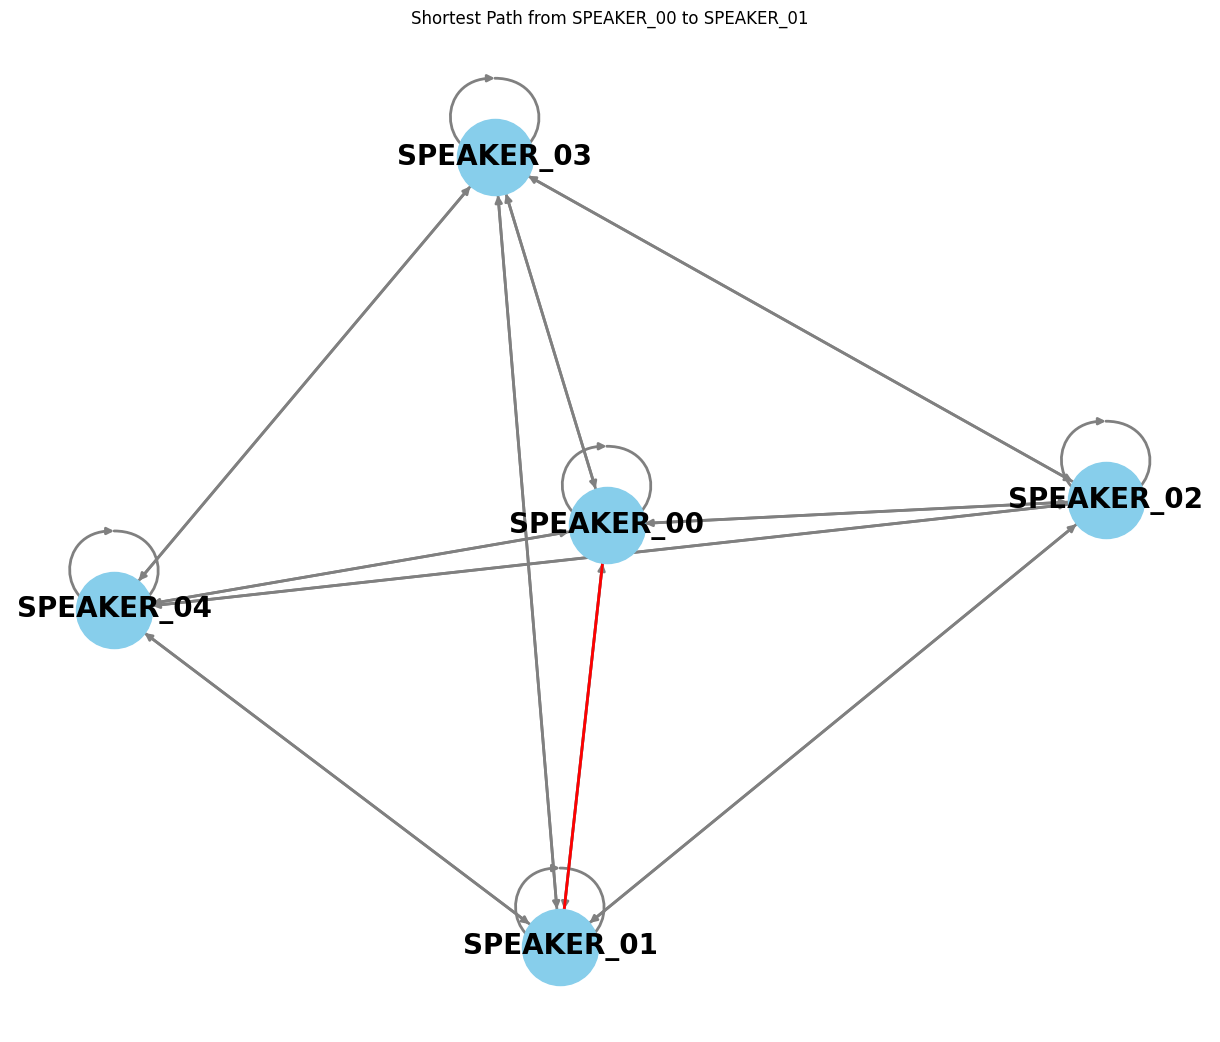

In [35]:
# Path Analysis
# Shortest Path
shortest_paths = dict(nx.all_pairs_shortest_path(G))
print("Shortest Paths:", shortest_paths)

# Visualization of shortest path between two nodes
source = 'SPEAKER_00'
target = 'SPEAKER_01'
shortest_path = nx.shortest_path(G, source=source, target=target)
path_edges = list(zip(shortest_path, shortest_path[1:]))
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=20, font_color="black", font_weight="bold", width=2, edge_color="gray")
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
plt.title(f'Shortest Path from {source} to {target}')
plt.show()

In [36]:
# Enhanced JSON Output
output = {
    'interaction_matrix': interaction_json,
    'frequency_analysis': frequency_json,
    'degree_centrality': degree_centrality,
    'betweenness_centrality': betweenness_centrality,
    'closeness_centrality': closeness_centrality,
    'eigenvector_centrality': eigenvector_centrality,
    'communities': [list(community) for community in communities],
    'network_density': density,
    'average_clustering': average_clustering
}

# Save Enhanced JSON to file
enhanced_output_file_path = 'D:\\Python_Projects\\collaboration_analysis\\analysis_output.json'
with open(enhanced_output_file_path, 'w', encoding='utf-8') as enhanced_output_file:
    json.dump(output, enhanced_output_file, ensure_ascii=False, indent=4)

# Display Enhanced JSON output
output

{'interaction_matrix': {'SPEAKER_00': {'SPEAKER_00': 686,
   'SPEAKER_01': 52,
   'SPEAKER_03': 62,
   'SPEAKER_04': 70,
   'SPEAKER_02': 66},
  'SPEAKER_01': {'SPEAKER_00': 50,
   'SPEAKER_01': 19,
   'SPEAKER_03': 9,
   'SPEAKER_04': 32,
   'SPEAKER_02': 7},
  'SPEAKER_03': {'SPEAKER_00': 66,
   'SPEAKER_01': 10,
   'SPEAKER_03': 7,
   'SPEAKER_04': 21,
   'SPEAKER_02': 13},
  'SPEAKER_04': {'SPEAKER_00': 67,
   'SPEAKER_01': 25,
   'SPEAKER_03': 20,
   'SPEAKER_04': 112,
   'SPEAKER_02': 28},
  'SPEAKER_02': {'SPEAKER_00': 68,
   'SPEAKER_01': 11,
   'SPEAKER_03': 19,
   'SPEAKER_04': 17,
   'SPEAKER_02': 54}},
 'frequency_analysis': [{'Speaker': 'SPEAKER_00', 'Frequency': 937},
  {'Speaker': 'SPEAKER_04', 'Frequency': 252},
  {'Speaker': 'SPEAKER_02', 'Frequency': 169},
  {'Speaker': 'SPEAKER_01', 'Frequency': 117},
  {'Speaker': 'SPEAKER_03', 'Frequency': 117}],
 'degree_centrality': {'SPEAKER_00': 2.5,
  'SPEAKER_01': 2.5,
  'SPEAKER_03': 2.5,
  'SPEAKER_04': 2.5,
  'SPEAKER_02':

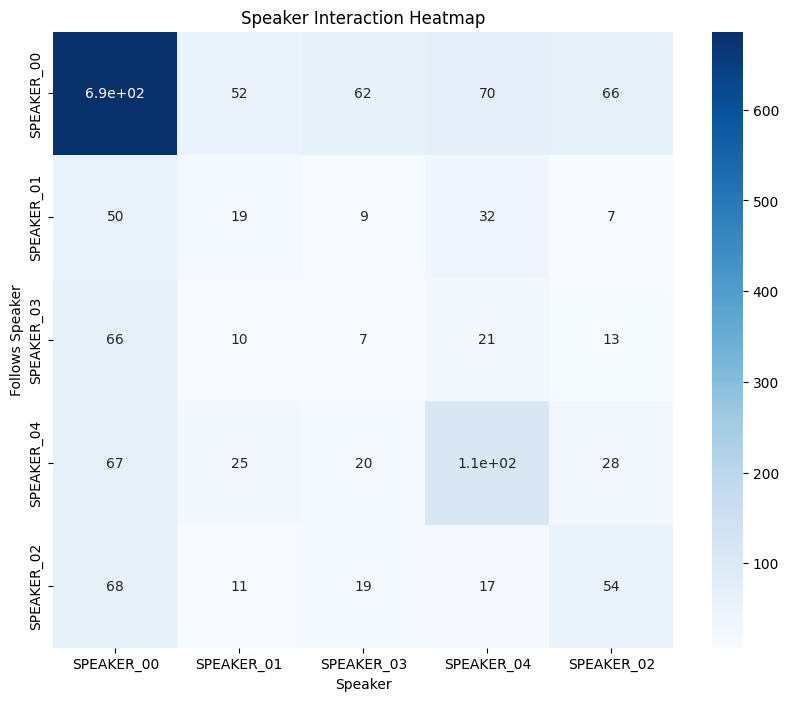

In [37]:
# Visualization (Optional)
# Plotting Interaction Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_df, annot=True, cmap='Blues')
plt.title('Speaker Interaction Heatmap')
plt.xlabel('Speaker')
plt.ylabel('Follows Speaker')
plt.show()

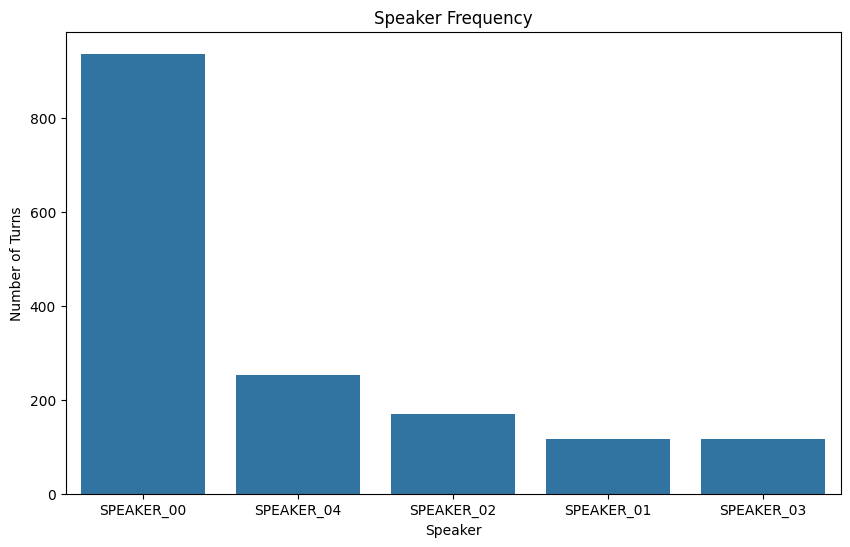

In [38]:
# Plotting Frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=frequency, x='Speaker', y='Frequency')
plt.title('Speaker Frequency')
plt.xlabel('Speaker')
plt.ylabel('Number of Turns')
plt.show()

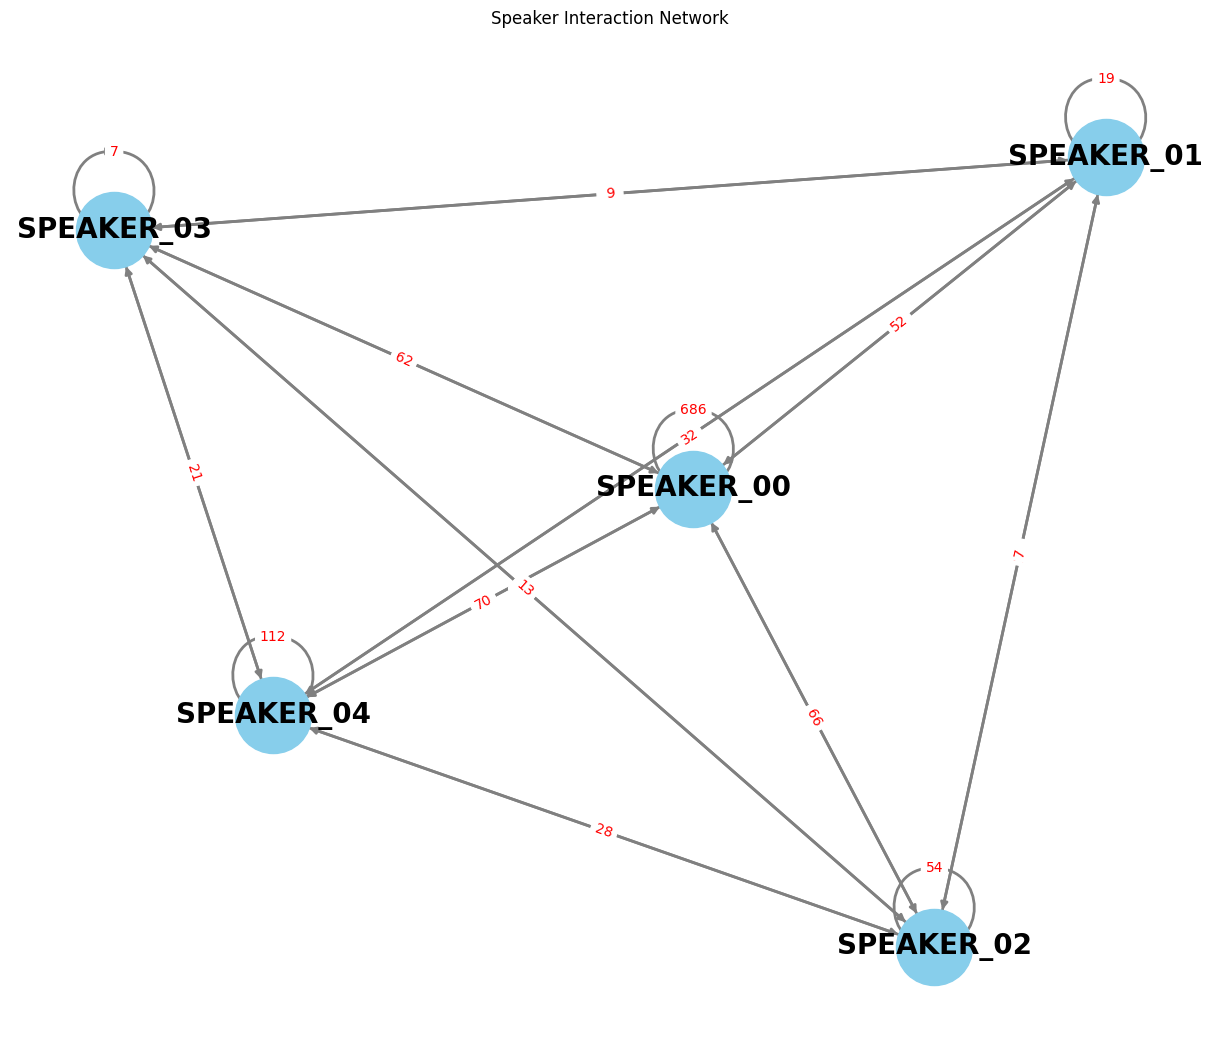

In [39]:
# Plotting Interaction Network Graph
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=20, font_color="black", font_weight="bold", width=2, edge_color="gray")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Speaker Interaction Network')
plt.show()